In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("output.csv", index_col = 0)

In [2]:
df

,type,category,review,star
Unnamed: 0,,,,
1,네스프레소,만족도,엄마가 요즘 코시국이라 카페 이용이 어렵다며 홈카페하게 커피머신을 알아봐달라고 하셨...,5
2,네스프레소,만족도,할인행사에 홀린듯 사버린 커피머신이지만 만족스럽게 사용하고 있습니다 ㅎ 웰컴팩도 구...,5
3,네스프레소,만족도,인기도가 젤 좋은거 같아서 버츄오플러스를 선택했는데 배송도 빠르고 제품 품질도 좋아...,4
4,네스프레소,만족도,하루 커피한잔이 필수가되어 구매했습니다. 장기간 다이어트중인데 아메리카노가 제일 행...,5
5,네스프레소,만족도,이 정도 비용으로 삶의 질을 높일 수 있다면 망설일 이유가 있을까요? ^^\n준비부...,5
...,...,...,...,...
51,일리,관리,생각보다 작아서 놀랐는데 책상에 놓고 사용하기에 더 좋고 귀여워요청소하기도 편하고 ...,4
52,일리,관리,진짜 잘써요 잔고장 일도 없고 세척 편하고 진짜 강추요,5
53,일리,관리,싸이즈도 아담하고 주방 인테리어 효과까지 좋아요단점은 물이 분사될때 주변으로 튀기면...,3


In [3]:
df2 = pd.read_csv("token_output.csv", index_col = 0)
df2=df2.drop(df2.columns[0], axis='columns')

In [4]:
df2

,type,category,review,star,token_review
0,네스프레소,만족도,엄마가 요즘 코시국이라 카페 이용이 어렵다며 홈카페하게 커피머신을 알아봐달라고 하셨...,5,"['엄마', '가', '요즘', '코', '시국', '이라', '카페', '이용',..."
1,네스프레소,만족도,할인행사에 홀린듯 사버린 커피머신이지만 만족스럽게 사용하고 있습니다 ㅎ 웰컴팩도 구...,5,"['할인', '행사', '에', '홀린', '듯', '사', '버린', '커피', ..."
2,네스프레소,만족도,인기도가 젤 좋은거 같아서 버츄오플러스를 선택했는데 배송도 빠르고 제품 품질도 좋아...,4,"['인', '기도', '가', '젤', '좋은', '거', '같아서', '버츄', ..."
3,네스프레소,만족도,하루 커피한잔이 필수가되어 구매했습니다. 장기간 다이어트중인데 아메리카노가 제일 행...,5,"['하루', '커피한잔', '이', '필수', '가', '되어', '구매', '했습..."
4,네스프레소,만족도,이 정도 비용으로 삶의 질을 높일 수 있다면 망설일 이유가 있을까요? ^^\n준비부...,5,"['이', '정도', '비용', '으로', '삶', '의', '질', '을', '높..."
...,...,...,...,...,...
7225,일리,관리,생각보다 작아서 놀랐는데 책상에 놓고 사용하기에 더 좋고 귀여워요청소하기도 편하고 ...,4,"['생각', '보다', '작아서', '놀랐는데', '책상', '에', '놓고', '..."
7226,일리,관리,진짜 잘써요 잔고장 일도 없고 세척 편하고 진짜 강추요,5,"['진짜', '잘써요', '잔고', '장', '일도', '없고', '세척', '편하..."
7227,일리,관리,싸이즈도 아담하고 주방 인테리어 효과까지 좋아요단점은 물이 분사될때 주변으로 튀기면...,3,"['싸이', '즈', '도', '아담하고', '주방', '인테리어', '효과', '..."
7228,일리,관리,홈카페에요 세척도편하고 이쁘고 맛있어요,5,"['홈', '카페', '에요', '세', '척도', '편하고', '이쁘고', '맛있..."


In [5]:
import os
import csv
import re
from math import log
import warnings
warnings.filterwarnings("ignore")
from konlpy.tag import Hannanum
hn = Hannanum()

In [6]:
#os.getcwd()

#os.chdir
docs=df2['token_review']
N=len(docs)
#remove carriage return
def cleancr(dic):
    line = []
    for i in range(len(dic)):
        line.append(re.sub("\s", "", dic[i]))
    return line

#count matches
def matches(dic, d):
    return d.count(dic)

In [7]:
#긍부정어 사전 로딩
f = open("positive.txt", 'r', encoding='UTF8')
positive = f.readlines()
f.close()
positive = cleancr(positive)

#부정어 사전 로딩
f = open("negative.txt", 'r', encoding='UTF8')
negative = f.readlines()
f.close()
negative = cleancr(negative)

In [8]:
#사전비교
N = len(docs)

res = np.zeros(shape=(N, 2), dtype = np.int8)
for i in range(N): #문서별로 수행
    d = docs[i]
    cnt = 0
    for j in range(len(positive)):
        dic = positive[j]        
        cnt += matches(dic, d)
    res[i, 0] = cnt

for i in range(N): #문서별로 수행
    d = docs[i]
    cnt = 0
    for j in range(len(negative)):
        dic = negative[j]        
        cnt += matches(dic, d)
    res[i, 1] = cnt
    
    
positive=[]
for i in range(N):
    res
    pos_rate = res[:, 0] / (res[:, 0] + res[:, 1])  #긍정도 계산
    positive.append(pos_rate) #하나의 리스트를 만들어서 한번에 df에 추가해야함.
    df2['positive']=pos_rate #형태소단위로 나누어진 리뷰저장

In [9]:
df2

,type,category,review,star,token_review,positive
0,네스프레소,만족도,엄마가 요즘 코시국이라 카페 이용이 어렵다며 홈카페하게 커피머신을 알아봐달라고 하셨...,5,"['엄마', '가', '요즘', '코', '시국', '이라', '카페', '이용',...",0.692308
1,네스프레소,만족도,할인행사에 홀린듯 사버린 커피머신이지만 만족스럽게 사용하고 있습니다 ㅎ 웰컴팩도 구...,5,"['할인', '행사', '에', '홀린', '듯', '사', '버린', '커피', ...",0.600000
2,네스프레소,만족도,인기도가 젤 좋은거 같아서 버츄오플러스를 선택했는데 배송도 빠르고 제품 품질도 좋아...,4,"['인', '기도', '가', '젤', '좋은', '거', '같아서', '버츄', ...",0.538462
3,네스프레소,만족도,하루 커피한잔이 필수가되어 구매했습니다. 장기간 다이어트중인데 아메리카노가 제일 행...,5,"['하루', '커피한잔', '이', '필수', '가', '되어', '구매', '했습...",0.600000
4,네스프레소,만족도,이 정도 비용으로 삶의 질을 높일 수 있다면 망설일 이유가 있을까요? ^^\n준비부...,5,"['이', '정도', '비용', '으로', '삶', '의', '질', '을', '높...",0.555556
...,...,...,...,...,...,...
7225,일리,관리,생각보다 작아서 놀랐는데 책상에 놓고 사용하기에 더 좋고 귀여워요청소하기도 편하고 ...,4,"['생각', '보다', '작아서', '놀랐는데', '책상', '에', '놓고', '...",1.000000
7226,일리,관리,진짜 잘써요 잔고장 일도 없고 세척 편하고 진짜 강추요,5,"['진짜', '잘써요', '잔고', '장', '일도', '없고', '세척', '편하...",1.000000
7227,일리,관리,싸이즈도 아담하고 주방 인테리어 효과까지 좋아요단점은 물이 분사될때 주변으로 튀기면...,3,"['싸이', '즈', '도', '아담하고', '주방', '인테리어', '효과', '...",1.000000
7228,일리,관리,홈카페에요 세척도편하고 이쁘고 맛있어요,5,"['홈', '카페', '에요', '세', '척도', '편하고', '이쁘고', '맛있...",1.000000


In [10]:
df3=df2.drop(df2.columns[2], axis='columns')
df3

,type,category,star,token_review,positive
0,네스프레소,만족도,5,"['엄마', '가', '요즘', '코', '시국', '이라', '카페', '이용',...",0.692308
1,네스프레소,만족도,5,"['할인', '행사', '에', '홀린', '듯', '사', '버린', '커피', ...",0.600000
2,네스프레소,만족도,4,"['인', '기도', '가', '젤', '좋은', '거', '같아서', '버츄', ...",0.538462
3,네스프레소,만족도,5,"['하루', '커피한잔', '이', '필수', '가', '되어', '구매', '했습...",0.600000
4,네스프레소,만족도,5,"['이', '정도', '비용', '으로', '삶', '의', '질', '을', '높...",0.555556
...,...,...,...,...,...
7225,일리,관리,4,"['생각', '보다', '작아서', '놀랐는데', '책상', '에', '놓고', '...",1.000000
7226,일리,관리,5,"['진짜', '잘써요', '잔고', '장', '일도', '없고', '세척', '편하...",1.000000
7227,일리,관리,3,"['싸이', '즈', '도', '아담하고', '주방', '인테리어', '효과', '...",1.000000
7228,일리,관리,5,"['홈', '카페', '에요', '세', '척도', '편하고', '이쁘고', '맛있...",1.000000


In [11]:
df3

,type,category,star,token_review,positive
0,네스프레소,만족도,5,"['엄마', '가', '요즘', '코', '시국', '이라', '카페', '이용',...",0.692308
1,네스프레소,만족도,5,"['할인', '행사', '에', '홀린', '듯', '사', '버린', '커피', ...",0.600000
2,네스프레소,만족도,4,"['인', '기도', '가', '젤', '좋은', '거', '같아서', '버츄', ...",0.538462
3,네스프레소,만족도,5,"['하루', '커피한잔', '이', '필수', '가', '되어', '구매', '했습...",0.600000
4,네스프레소,만족도,5,"['이', '정도', '비용', '으로', '삶', '의', '질', '을', '높...",0.555556
...,...,...,...,...,...
7225,일리,관리,4,"['생각', '보다', '작아서', '놀랐는데', '책상', '에', '놓고', '...",1.000000
7226,일리,관리,5,"['진짜', '잘써요', '잔고', '장', '일도', '없고', '세척', '편하...",1.000000
7227,일리,관리,3,"['싸이', '즈', '도', '아담하고', '주방', '인테리어', '효과', '...",1.000000
7228,일리,관리,5,"['홈', '카페', '에요', '세', '척도', '편하고', '이쁘고', '맛있...",1.000000


In [12]:
# 자료 구조 확인
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7230 entries, 0 to 7229
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          7230 non-null   object 
 1   category      7230 non-null   object 
 2   star          7230 non-null   int64  
 3   token_review  7230 non-null   object 
 4   positive      6425 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 596.9+ KB


In [13]:
# 기초 통계 확인
df3.describe()

,star,positive
count,7230.000000,6425.000000
mean,4.859474,0.757542
std,0.431699,0.299894
min,1.000000,0.000000
25%,5.000000,0.500000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


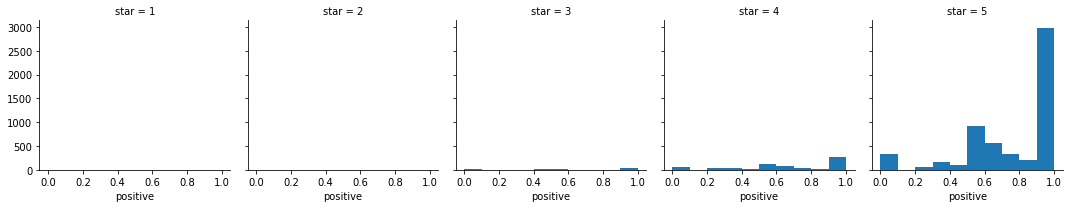

In [14]:
# 별점에 따른 positive 시각화 
g = sns.FacetGrid(data=df3, col='star')
g.map(plt.hist, 'positive')

<AxesSubplot:xlabel='star', ylabel='positive'>

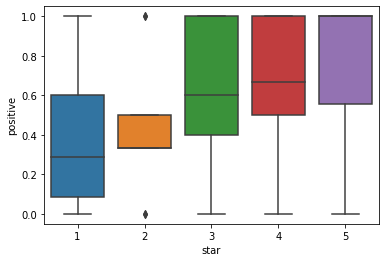

In [15]:
# 별점에 따른 positive boxplot으로 시각화
sns.boxplot(x='star', y='positive', data=df3)

In [16]:
df3

,type,category,star,token_review,positive
0,네스프레소,만족도,5,"['엄마', '가', '요즘', '코', '시국', '이라', '카페', '이용',...",0.692308
1,네스프레소,만족도,5,"['할인', '행사', '에', '홀린', '듯', '사', '버린', '커피', ...",0.600000
2,네스프레소,만족도,4,"['인', '기도', '가', '젤', '좋은', '거', '같아서', '버츄', ...",0.538462
3,네스프레소,만족도,5,"['하루', '커피한잔', '이', '필수', '가', '되어', '구매', '했습...",0.600000
4,네스프레소,만족도,5,"['이', '정도', '비용', '으로', '삶', '의', '질', '을', '높...",0.555556
...,...,...,...,...,...
7225,일리,관리,4,"['생각', '보다', '작아서', '놀랐는데', '책상', '에', '놓고', '...",1.000000
7226,일리,관리,5,"['진짜', '잘써요', '잔고', '장', '일도', '없고', '세척', '편하...",1.000000
7227,일리,관리,3,"['싸이', '즈', '도', '아담하고', '주방', '인테리어', '효과', '...",1.000000
7228,일리,관리,5,"['홈', '카페', '에요', '세', '척도', '편하고', '이쁘고', '맛있...",1.000000


In [17]:
#긍정도 평균
statistics1=pd.pivot_table(df3.drop(df3.columns[[2,4]], axis=1), index = ['type','category'], aggfunc='count')
statistics1

token_review
type  category              
네스프레소 가격                 447
      관리                  40
      냄새                 105
      디자인                287
      만족도               2087
      맛                  229
      색상                 126
      성능                  12
      소음                  72
      조작성                 73
일리    가격                 424
      관리                  55
      냄새                  60
      디자인                499
      만족도               2000
      맛                  265
      색상                 285
      성능                  18
      소음                  69
      조작성                 77

In [18]:
#긍정도 평균
statistics1_=pd.pivot_table(df3.drop(df3.columns[[2, 3]], axis=1), index = ['type','category'], aggfunc='mean')

In [19]:
statistics1_

positive
type  category          
네스프레소 가격        0.789602
      관리        0.635367
      냄새        0.820984
      디자인       0.794052
      만족도       0.783747
      맛         0.872080
      색상        0.609329
      성능        0.753788
      소음        0.474332
      조작성       0.741488
일리    가격        0.738361
      관리        0.607326
      냄새        0.797925
      디자인       0.779208
      만족도       0.760568
      맛         0.829380
      색상        0.565234
      성능        0.872619
      소음        0.404021
      조작성       0.674886

In [20]:
statistics1__ = pd.concat([statistics1_, statistics1], join='outer', axis=1)
statistics1__

positive  token_review
type  category                        
네스프레소 가격        0.789602           447
      관리        0.635367            40
      냄새        0.820984           105
      디자인       0.794052           287
      만족도       0.783747          2087
      맛         0.872080           229
      색상        0.609329           126
      성능        0.753788            12
      소음        0.474332            72
      조작성       0.741488            73
일리    가격        0.738361           424
      관리        0.607326            55
      냄새        0.797925            60
      디자인       0.779208           499
      만족도       0.760568          2000
      맛         0.829380           265
      색상        0.565234           285
      성능        0.872619            18
      소음        0.404021            69
      조작성       0.674886            77

In [21]:
statistics2=statistics1.groupby('type').sum()
statistics2

,token_review
type,
네스프레소,3478
일리,3752


In [22]:
statistics2_=statistics1_.groupby('type').mean()
statistics2_

,positive
type,
네스프레소,0.727477
일리,0.702953


In [23]:
statistics2__ = pd.concat([statistics2_, statistics2], join='outer', axis=1)
statistics2__

,positive,token_review
type,,
네스프레소,0.727477,3478
일리,0.702953,3752


In [24]:
statistics3 = pd.pivot_table(df3.drop(df3.columns[[1, 4]], axis=1), index = ['type','star'], aggfunc='count')
statistics3

token_review
type  star              
네스프레소 1                8
      2                2
      3               32
      4              299
      5             3137
일리    1               12
      2                7
      3               58
      4              430
      5             3245

In [25]:
#긍정도 평균
statistics3_ = pd.pivot_table(df3.drop(df3.columns[[1, 3]], axis=1), index = ['type','star'], aggfunc='mean')
statistics3_

positive
type  star          
네스프레소 1     0.491740
      2     0.500000
      3     0.698932
      4     0.667415
      5     0.787479
일리    1     0.310065
      2     0.428571
      3     0.566771
      4     0.696902
      5     0.751668

In [26]:
statistics3__ = pd.concat([statistics3_, statistics3], join='outer', axis=1)
statistics3__

positive  token_review
type  star                        
네스프레소 1     0.491740             8
      2     0.500000             2
      3     0.698932            32
      4     0.667415           299
      5     0.787479          3137
일리    1     0.310065            12
      2     0.428571             7
      3     0.566771            58
      4     0.696902           430
      5     0.751668          3245

In [27]:
df1=df2[df2['star']==5][['type','category','token_review', 'positive']]

In [28]:
df1

,type,category,token_review,positive
0,네스프레소,만족도,"['엄마', '가', '요즘', '코', '시국', '이라', '카페', '이용',...",0.692308
1,네스프레소,만족도,"['할인', '행사', '에', '홀린', '듯', '사', '버린', '커피', ...",0.600000
3,네스프레소,만족도,"['하루', '커피한잔', '이', '필수', '가', '되어', '구매', '했습...",0.600000
4,네스프레소,만족도,"['이', '정도', '비용', '으로', '삶', '의', '질', '을', '높...",0.555556
5,네스프레소,만족도,"['써', '보면서', '느낀', '것', '들', '\n', '1', '물', '...",0.500000
...,...,...,...,...
7222,일리,관리,"['열흘', '정도', '걸렸나', '관리', '하기', '편하고', '맛있어요',...",1.000000
7224,일리,관리,"['커피', '맛있고', '세척', '편하고', '좋네요', '배송', '도', '...",1.000000
7226,일리,관리,"['진짜', '잘써요', '잔고', '장', '일도', '없고', '세척', '편하...",1.000000
7228,일리,관리,"['홈', '카페', '에요', '세', '척도', '편하고', '이쁘고', '맛있...",1.000000


In [29]:
df2_=df2[(df2['star']==5)&(df2['category']=='만족도')&(df2['type']=='네스프레소')][['type','category','token_review', 'positive']]
df2_

,type,category,token_review,positive
0,네스프레소,만족도,"['엄마', '가', '요즘', '코', '시국', '이라', '카페', '이용',...",0.692308
1,네스프레소,만족도,"['할인', '행사', '에', '홀린', '듯', '사', '버린', '커피', ...",0.600000
3,네스프레소,만족도,"['하루', '커피한잔', '이', '필수', '가', '되어', '구매', '했습...",0.600000
4,네스프레소,만족도,"['이', '정도', '비용', '으로', '삶', '의', '질', '을', '높...",0.555556
5,네스프레소,만족도,"['써', '보면서', '느낀', '것', '들', '\n', '1', '물', '...",0.500000
...,...,...,...,...
2082,네스프레소,만족도,"['배송', '도', '빠르고', '블랙', '은', '구', '하기', '힘들었는...",0.333333
2083,네스프레소,만족도,"['검정', '사려다가', '실버', '샀는데', '괸찮아', '요', '촌', '...",0.600000
2084,네스프레소,만족도,"['올해', '산', '물건', '중', '에', '가장', '만족도', '가', ...",0.500000
2085,네스프레소,만족도,"['너무', '너무', '좋아요', '끄레마', '잔뜩', '커피', '매일', '...",1.000000


In [30]:
#평점은 좋은데 긍정도 낮은 리뷰 삭제
index=df2_[df2_['positive']<0.7].index
df2_=df2_.drop(index)    

In [31]:
df2_

,type,category,token_review,positive
9,네스프레소,만족도,"['오', '리지', '널', '과', '버츄', '오', '플러스', '중', '...",0.750000
10,네스프레소,만족도,"['카페', '가', '집', '으로', '들어왔습니다', '아침', '마다', '...",0.700000
15,네스프레소,만족도,"['네스프레소', '캡슐', '커피', '는', '10만원', '초', '중', '...",0.700000
18,네스프레소,만족도,"['버츄오', '가', '캡슐', '도', '비싸고', '호환', '캡슐', '이'...",0.818182
29,네스프레소,만족도,"['오', '리지', '널', '과', '버츄', '오', '플러스', '중', '...",0.750000
...,...,...,...,...
2076,네스프레소,만족도,"['빠른', '배송', '상품', '에', '만족합니다']",1.000000
2077,네스프레소,만족도,"['아주', '갠찬아요', '굿', '입니다']",NaN
2079,네스프레소,만족도,"['상담', '도', '잘해주시고', '이제야', '작성', '하네요', '하루',...",0.800000
2085,네스프레소,만족도,"['너무', '너무', '좋아요', '끄레마', '잔뜩', '커피', '매일', '...",1.000000


In [32]:
df2_['positive'].mean(axis=0)

0.966161745578786

In [33]:
df2_=df2[(df2['star']==5)&(df2['category']=='만족도')&(df2['type']=='일리')][['type','category','token_review', 'positive']]
df2_

,type,category,token_review,positive
3478,일리,만족도,"['기본', '적', '으로', '에스프레소', '아메리카노', '용', '캡슐',...",0.666667
3479,일리,만족도,"['너무', '이뻐요', '역시', '화이트', '가', '진리', '배송', '받...",0.333333
3481,일리,만족도,"['114', '에', '구매', '했고', '1112', '에', '왔습니다', ...",0.555556
3484,일리,만족도,"['1', '먼저', '배송', '은', '우체국택배', '로', '4일', '정도...",0.583333
3485,일리,만족도,"['5일', '만에', '배송', '받았어요', '생각', '한', '것', '보다...",0.666667
...,...,...,...,...
5473,일리,만족도,"['화이트', '가', '가격', '이', '더', '비싸서', '고민', '됐는데...",0.000000
5474,일리,만족도,"['검정', '도', '잇는데', '화이트', '가', '더', '이쁘네요']",0.500000
5475,일리,만족도,"['배송', '빠르고', '너무', '귀여워요', '좋아요']",1.000000
5476,일리,만족도,"['배송', '빠르고', '커피', '맛', '도', '좋습니다']",NaN


In [34]:
#평점은 좋은데 긍정도 낮은 리뷰 삭제
index=df2_[df2_['positive']<0.7].index
df2_=df2_.drop(index)    

In [35]:
df2_

,type,category,token_review,positive
3487,일리,만족도,"['기존', '에', '이티', '닮은', '일리', '캡슐', '머신', '써',...",0.800000
3491,일리,만족도,"['드디어', '기다리던', '일리', '가', '도착', '햇습니', '다', '...",0.857143
3493,일리,만족도,"['오마이', '마이', '마이', '갓', '일단', '해외', '배송', '이라...",0.750000
3498,일리,만족도,"['여자친구', '에게', '3', '주년', '선물', '로', '줬습니다', '...",1.000000
3501,일리,만족도,"['장점', '이쁘다', '이쁘다', '이쁘다', '맛있다', '맛있다', '맛있다...",0.818182
...,...,...,...,...
5471,일리,만족도,"['배송', '도', '생각', '한', '것', '보다', '빠르고', '물품',...",1.000000
5472,일리,만족도,"['이쁘고', '커피', '맛', '도', '좋아요', '배송', '도', '빨라요']",1.000000
5475,일리,만족도,"['배송', '빠르고', '너무', '귀여워요', '좋아요']",1.000000
5476,일리,만족도,"['배송', '빠르고', '커피', '맛', '도', '좋습니다']",NaN


In [36]:
df3['positive'].mean(axis=0)

0.7575424310891538